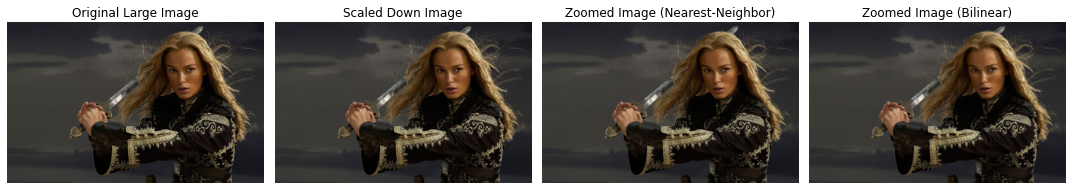

Normalized SSD for Nearest-Neighbor Zoom: 27.964142659505207
Normalized SSD for Bilinear Zoom: 30.22005997721354


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def nearest_neighbor_zoom(image, scale_factor):
    width, height = image.size
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    new_image = Image.new("RGB", (new_width, new_height))

    for x in range(new_width):
        for y in range(new_height):
            src_x = int(x / scale_factor)
            src_y = int(y / scale_factor)
            new_image.putpixel((x, y), image.getpixel((src_x, src_y)))

    return new_image

def bilinear_interpolation_zoom(image, scale_factor):
    width, height = image.size
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    new_image = Image.new("RGB", (new_width, new_height))

    for x in range(new_width):
        for y in range(new_height):
            src_x = x / scale_factor
            src_y = y / scale_factor
            x1, y1 = int(src_x), int(src_y)
            x2, y2 = x1 + 1, y1 + 1

            if x2 >= width:
                x2 = x1
            if y2 >= height:
                y2 = y1

            dx = src_x - x1
            dy = src_y - y1

            pixel_x1y1 = np.array(image.getpixel((x1, y1)))
            pixel_x2y1 = np.array(image.getpixel((x2, y1)))
            pixel_x1y2 = np.array(image.getpixel((x1, y2)))
            pixel_x2y2 = np.array(image.getpixel((x2, y2)))

            interpolated_pixel = (
                (1 - dx) * (1 - dy) * pixel_x1y1
                + dx * (1 - dy) * pixel_x2y1
                + (1 - dx) * dy * pixel_x1y2
                + dx * dy * pixel_x2y2
            )

            new_image.putpixel((x, y), tuple(interpolated_pixel.astype(int)))

    return new_image

def normalized_ssd(image1, image2):
    arr1 = np.array(image1)
    arr2 = np.array(image2)
    diff = arr1 - arr2
    ssd = np.sum(diff ** 2)
    normalized = ssd / (arr1.shape[0] * arr1.shape[1] * 3)  # Normalize by image size and channels
    return normalized

# Load the original and scaled-down images
original_large_image = Image.open("im07.png")
scaled_down_image = Image.open("im07small.png")

# Define the scale factor
scale_factor = 4

# Zoom using nearest-neighbor method
zoomed_nearest = nearest_neighbor_zoom(scaled_down_image, scale_factor)

# Zoom using bilinear interpolation method
zoomed_bilinear = bilinear_interpolation_zoom(scaled_down_image, scale_factor)

# Calculate normalized SSD for nearest-neighbor zoomed image
ssd_nearest = normalized_ssd(zoomed_nearest, original_large_image)

# Calculate normalized SSD for bilinear zoomed image
ssd_bilinear = normalized_ssd(zoomed_bilinear, original_large_image)

# Display images using Matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(original_large_image)
plt.title("Original Large Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(scaled_down_image)
plt.title("Scaled Down Image")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(zoomed_nearest)
plt.title("Zoomed Image (Nearest-Neighbor)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(zoomed_bilinear)
plt.title("Zoomed Image (Bilinear)")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Normalized SSD for Nearest-Neighbor Zoom:", ssd_nearest)
print("Normalized SSD for Bilinear Zoom:", ssd_bilinear)
